In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import math

In [2]:
data_amundi = pd.read_csv('./data/amundi-msci-wrld-ae-c.csv')
data_amundi.name = 'amundi-msci-wrld-ae-c'

data_db = pd.read_csv('./data/db-x-trackers-ii-global-sovereign-5.csv')
data_db.name = 'db-x-trackers-ii-global-sovereign-5'

data_ishares = pd.read_csv('./data/ishares-global-corporate-bond-$.csv')
data_ishares.name = 'ishares-global-corporate-bond-$'

data_spdr = pd.read_csv('./data/spdr-gold-trust.csv')
data_spdr.name = 'spdr-gold-trust'

data_us = pd.read_csv('./data/usdollar.csv')
data_us.name = 'usdollar'

data = [data_amundi, data_db, data_ishares, data_spdr, data_us]

In [3]:
# for dataframe in data:
# #    
#     for index, row in dataframe.iterrows():
#         dataframe.loc[index, 'Date'] = (dataframe.loc[index, 'Date'][0:3]+
#                                     dataframe.loc[index, 'Date'][4:6]+
#                                     dataframe.loc[index, 'Date'][8:]
#                                        )
        
#     dataframe['Date'] = pd.to_datetime(dataframe['Date'], format ='%b%d%Y')

In [4]:
for dataframe in data:
    
    for index, row in dataframe.iterrows():
        dataframe.loc[index, 'Change %'] = dataframe.loc[index, 'Change %'][0:4]
        dataframe.loc[index,'Change %'] = float(dataframe.loc[index,'Change %'])

In [5]:
for dataframe in data:
    print(dataframe.name, dataframe.describe())

amundi-msci-wrld-ae-c             Price
count  247.000000
mean   185.298785
std     14.638420
min    136.840000
25%    179.285000
50%    186.670000
75%    196.985000
max    206.850000
db-x-trackers-ii-global-sovereign-5             Price
count  255.000000
mean   260.346235
std      4.182903
min    252.750000
25%    257.460000
50%    259.620000
75%    263.360000
max    269.360000
ishares-global-corporate-bond-$             Price
count  254.000000
mean    80.619331
std      1.774699
min     75.010000
25%     79.632500
50%     80.855000
75%     81.757500
max     84.170000
spdr-gold-trust             Price
count  274.000000
mean   167.205949
std     13.049378
min    138.040000
25%    158.010000
50%    168.355000
75%    178.382500
max    193.890000
usdollar             Price
count  262.000000
mean    95.820649
std      3.179579
min     89.680000
25%     93.050000
50%     96.485000
75%     98.637500
max    102.820000


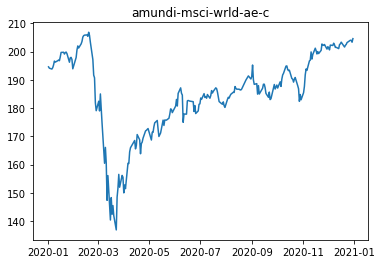

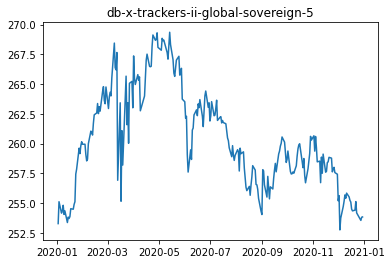

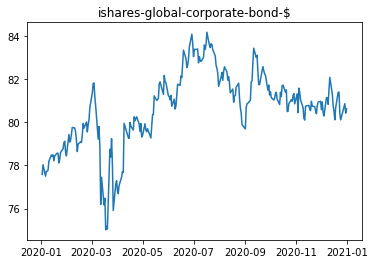

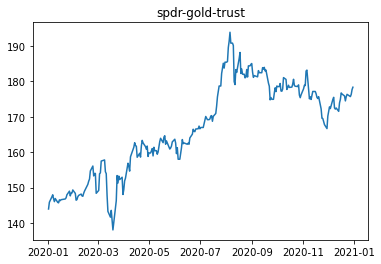

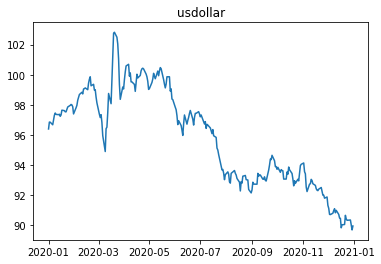

In [6]:
for dataframe in data:  
    plt.plot(dataframe['Date'], dataframe['Price'])
    plt.title(dataframe.name)
    plt.show()

In [7]:
def returns(assets):
    current_value = assets["Price"].tail(1)
    buy_amount = assets.loc[0, 'Price']
    return (current_value - buy_amount)/buy_amount *100

for assets in data:
    print(assets.name ,'\n Returns:', float(returns(assets)))

amundi-msci-wrld-ae-c 
 Returns: -4.88317528595171
db-x-trackers-ii-global-sovereign-5 
 Returns: -0.22061140876142543
ishares-global-corporate-bond-$ 
 Returns: -3.7707764822624736
spdr-gold-trust 
 Returns: -19.29244225162594
usdollar 
 Returns: 7.171447631754506


In [8]:
def volatility(assets):
    N = len(assets)
    muX = assets['Change %'].sum()/len(assets)
    sigmaX = math.sqrt(np.square(np.subtract(assets['Change %'], muX).mean()))
    return sigmaX/muX*100

for assets in data:
    print(assets.name ,'\n Volatility:', float(volatility(assets)))

amundi-msci-wrld-ae-c 
 Volatility: 9.969930945960345e-15
db-x-trackers-ii-global-sovereign-5 
 Volatility: 4.323298382496717e-14
ishares-global-corporate-bond-$ 
 Volatility: 4.1315551488913264e-14
spdr-gold-trust 
 Volatility: 1.134037818820385e-14
usdollar 
 Volatility: -3.9254559448960484e-13


In [9]:
def value(shares, assets):
    return sum(shares * assets['Price'])